In [3]:
#SVM Classification
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [7]:
#Load data
Train=pd.read_csv("SalaryDataTrain.csv")
Test=pd.read_csv("SalaryDataTest.csv")

In [8]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# Preprocessing Data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#Convert categorical variables into numerical variable
columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
labelencoder=LabelEncoder()
for i in columns:
    Train[i]=labelencoder.fit_transform(Train[i])
    Test[i]=labelencoder.fit_transform(Test[i])

In [14]:
Train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K


In [15]:
Test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

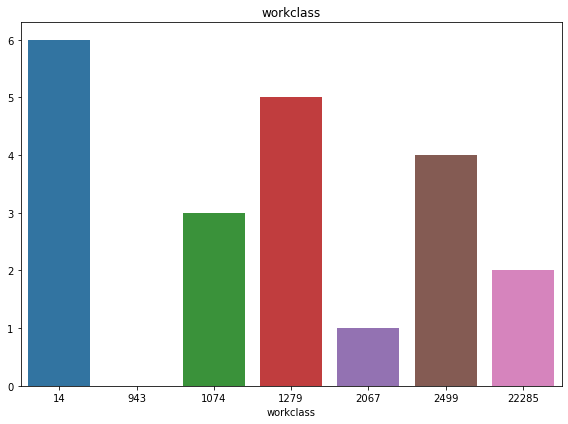

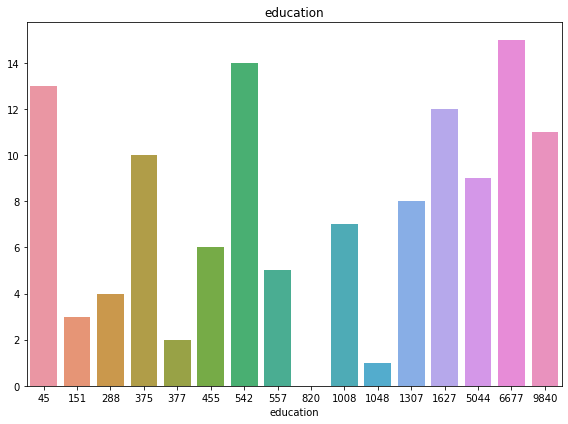

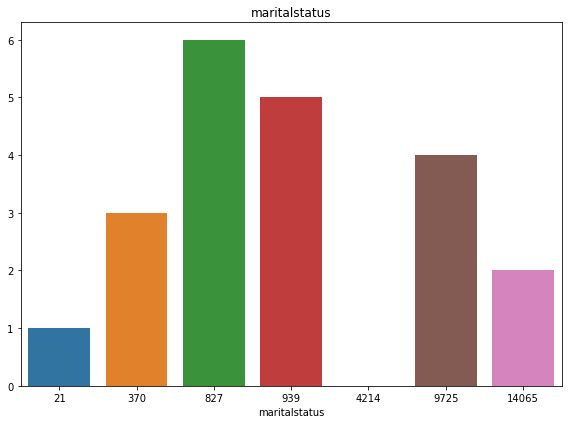

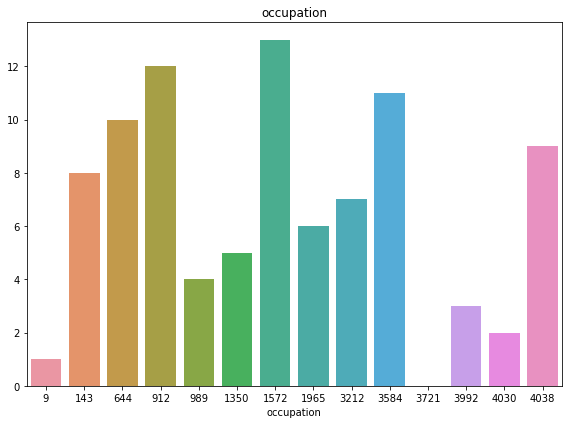

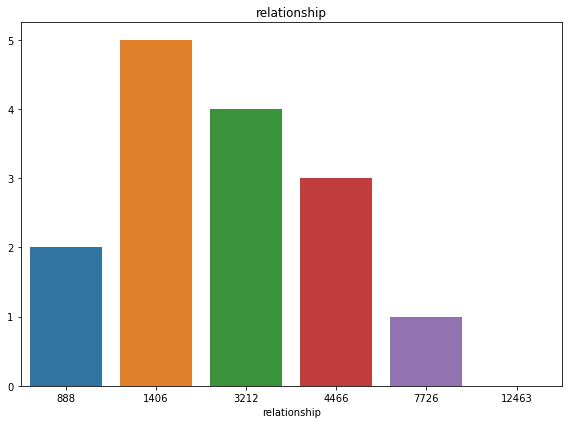

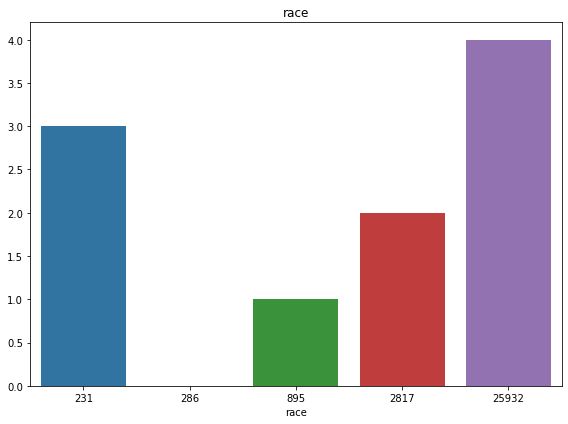

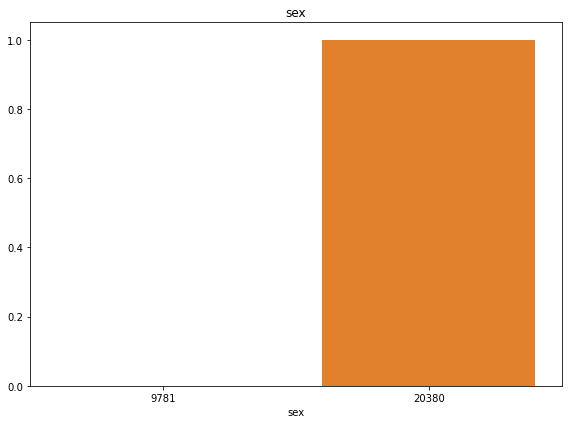

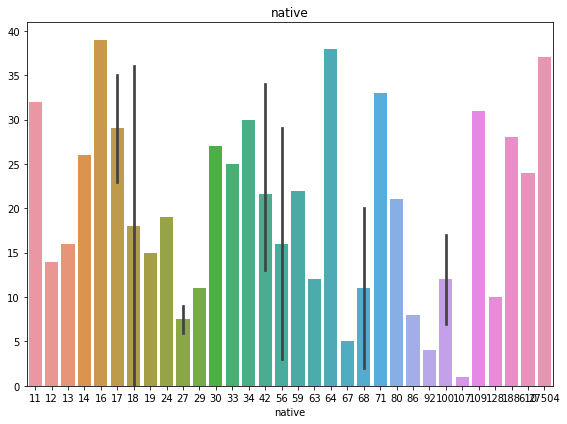

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in columns:
    plt.figure(figsize=(8,6))
    sns.barplot(Train[col].value_counts(),Train[col].value_counts().index,data=Train)
    plt.title(col)
    plt.tight_layout()

In [20]:
#Split data into train test
X_train=Train.iloc[:,0:13]
Y_train=Train.iloc[:,13]
X_test=Test.iloc[:,0:13]
Y_test=Test.iloc[:,13]

In [21]:
#Normalize
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)
X_train=norm_func(X_train)
X_test=norm_func(X_test)

# SVM Clssification

In [25]:
#Kernel=Linear
model_linear=SVC(kernel="linear")
model_linear.fit(X_train,Y_train)
pred_test_linear=model_linear.predict(X_test)

print("Accuracy:",np.mean(pred_test_linear==Y_test))
print(classification_report(Y_test,pred_test_linear))

Accuracy: 0.8098273572377158
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     11360
        >50K       0.77      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060



In [28]:
#Kernel=rbf
model_rbf=SVC(kernel='rbf')
model_rbf.fit(X_train,Y_train)
pred_test_rbf=model_rbf.predict(X_test)

print("Accuracy:",np.mean(pred_test_rbf==Y_test))
print(classification_report(Y_test,pred_test_rbf))

Accuracy: 0.8432934926958832
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     11360
        >50K       0.75      0.55      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.84      0.83     15060



In [30]:
#Kernel=poly
model_poly=SVC(kernel='poly')
model_poly.fit(X_train,Y_train)
pred_test_poly=model_poly.predict(X_test)

print("Accuracy:",np.mean(pred_test_poly==Y_test))
print(classification_report(Y_test,pred_test_poly))

Accuracy: 0.8435590969455511
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     11360
        >50K       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060



# from above classification in that used different kernal,linear gives 80% accuracy, rbf 82% & poly 81% accuracy.